In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [47]:
df = pd.read_csv(r"C:\Users\GWX-DATA\Downloads\laptops.csv")
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [3]:
df.info

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  \
0               0           0         Acer         4    2   1         5   
1               1           1         Dell         3    1   1         3   
2               2           2         Dell         3    1   1         7   
3               3           3         Dell         4    2   1         5   
4               4           4           HP         4    2   1         7   
..            ...         ...          ...       ...  ...  ..       ...   
233           233         233       Lenovo         4    2   1         7   
234           234         234      Toshiba         3    2   1         5   
235           235         235       Lenovo         4    2   1         5   
236           236         236       Lenovo         3    3   1         5   
237           237         237      Toshiba         3    2   1         5   

     Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weigh

In [4]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
#Single Linear Regression

#You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. _
##Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

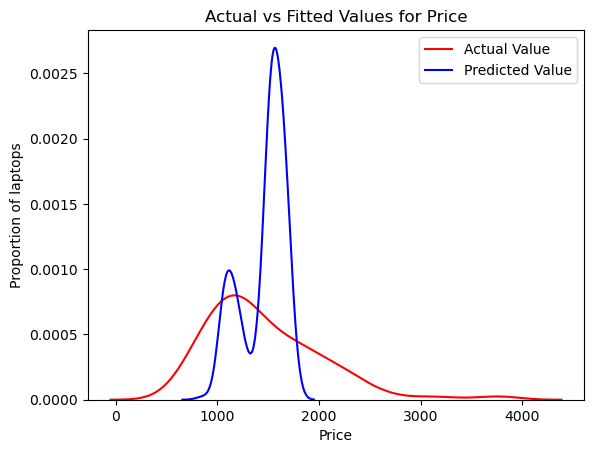

In [6]:
#Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()



In [7]:
#Evaluate the Mean Squared Error and R^2 score values for the model.

mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [8]:
#Multiple Linear Regression

#The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', _
##'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

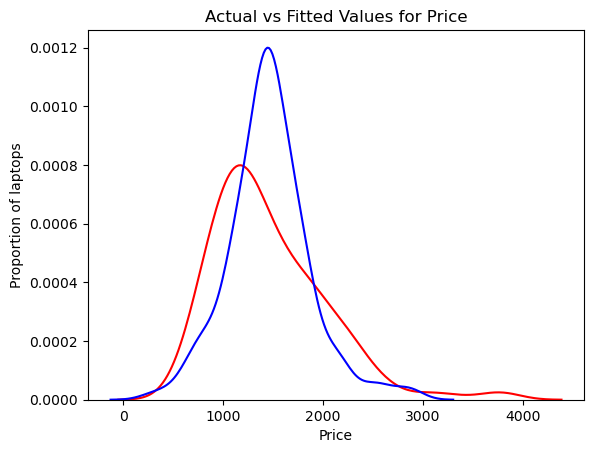

In [36]:
#Plot the Distribution graph of the predicted values as well as the Actual values

ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.show()
plt.close()


In [37]:
#Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?
mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)
print("R^2:", r2)
print("Mean Squared Error:", mse)

R^2: 0.5082509055187374
Mean Squared Error: 161680.57263893107


In [54]:
# Polynomial Regression

#Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees._
##Remember that polynomial fits are done using `numpy.polyfit

X = np.array(X).flatten()
Y = np.array(Y).flatten()

# degree 1
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

# degree 3
f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

# degree 5
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [59]:
#Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
    plt.show()



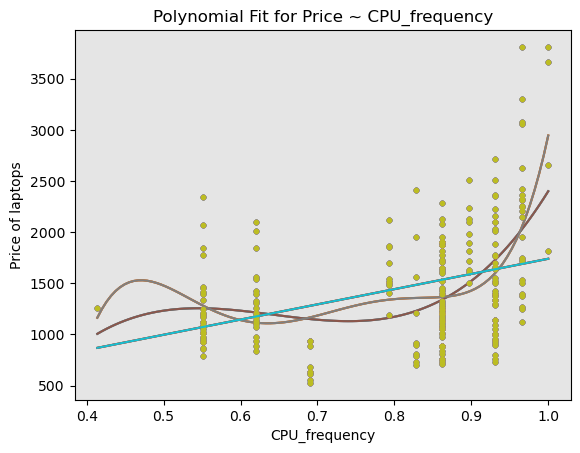

In [60]:
#Call this function for the 3 models created and get the required graphs

# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

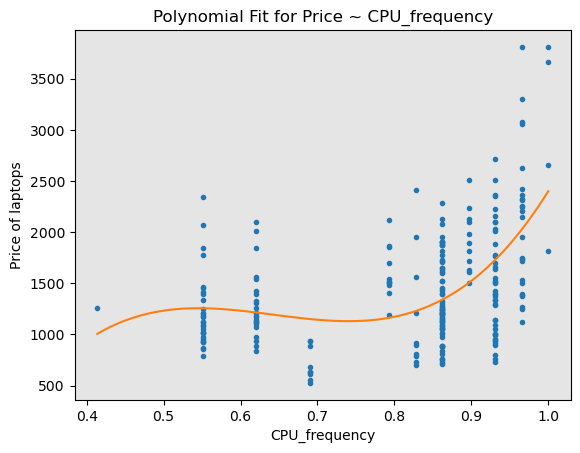

In [61]:
# Call for function of degree 3

PlotPolly(p3, X, Y, 'CPU_frequency')

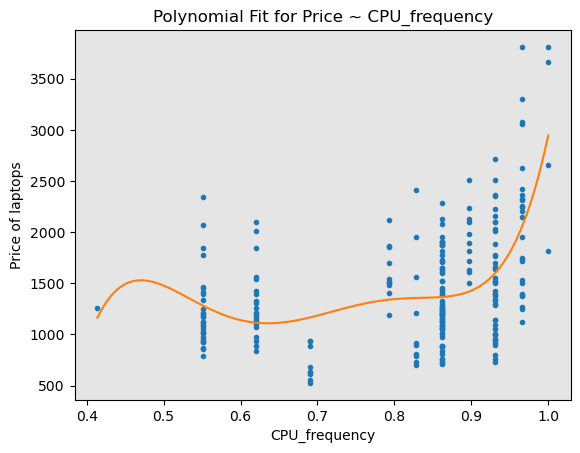

In [62]:
# Call for function of degree 5

PlotPolly(p5, X, Y, 'CPU_frequency')

In [24]:
#Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.

r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531053
The MSE value for 3rd degree polynomial is:  241024.86303848788
The R-square value for 5th degree polynomial is:  0.3030822706442695
The MSE value for 5th degree polynomial is:  229137.29548057468


In [25]:
#Pipeline

#Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression._
##Use the set of multiple features as before to create this pipeline.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [26]:
#Evaluate the MSE and R^2 values for the this predicted output

print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.8612802837
R^2 for multi-variable polynomial pipeline is:  0.6332094535859659
